In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Liver.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)

In [3]:
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [4]:
df.dropna(inplace=True)

In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [6]:
df.columns=["Age","Gender","TBilirubin","DBilirubin","AAPhosphotase","SpAAmino","SoAAmino","Protiens","Albumin","Albumin_Globulin","Target"]


In [7]:
df.head()

,Age,Gender,TBilirubin,DBilirubin,AAPhosphotase,SpAAmino,SoAAmino,Protiens,Albumin,Albumin_Globulin,Target
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [8]:
df["Gender"]=np.where(df["Gender"]=="Male",1,0)

In [9]:

col=[
    "TBilirubin",
    "DBilirubin",
    "AAPhosphotase",
    "SpAAmino",
    "SoAAmino"
]
for val in col:
    df[val]=np.log1p(df[val])




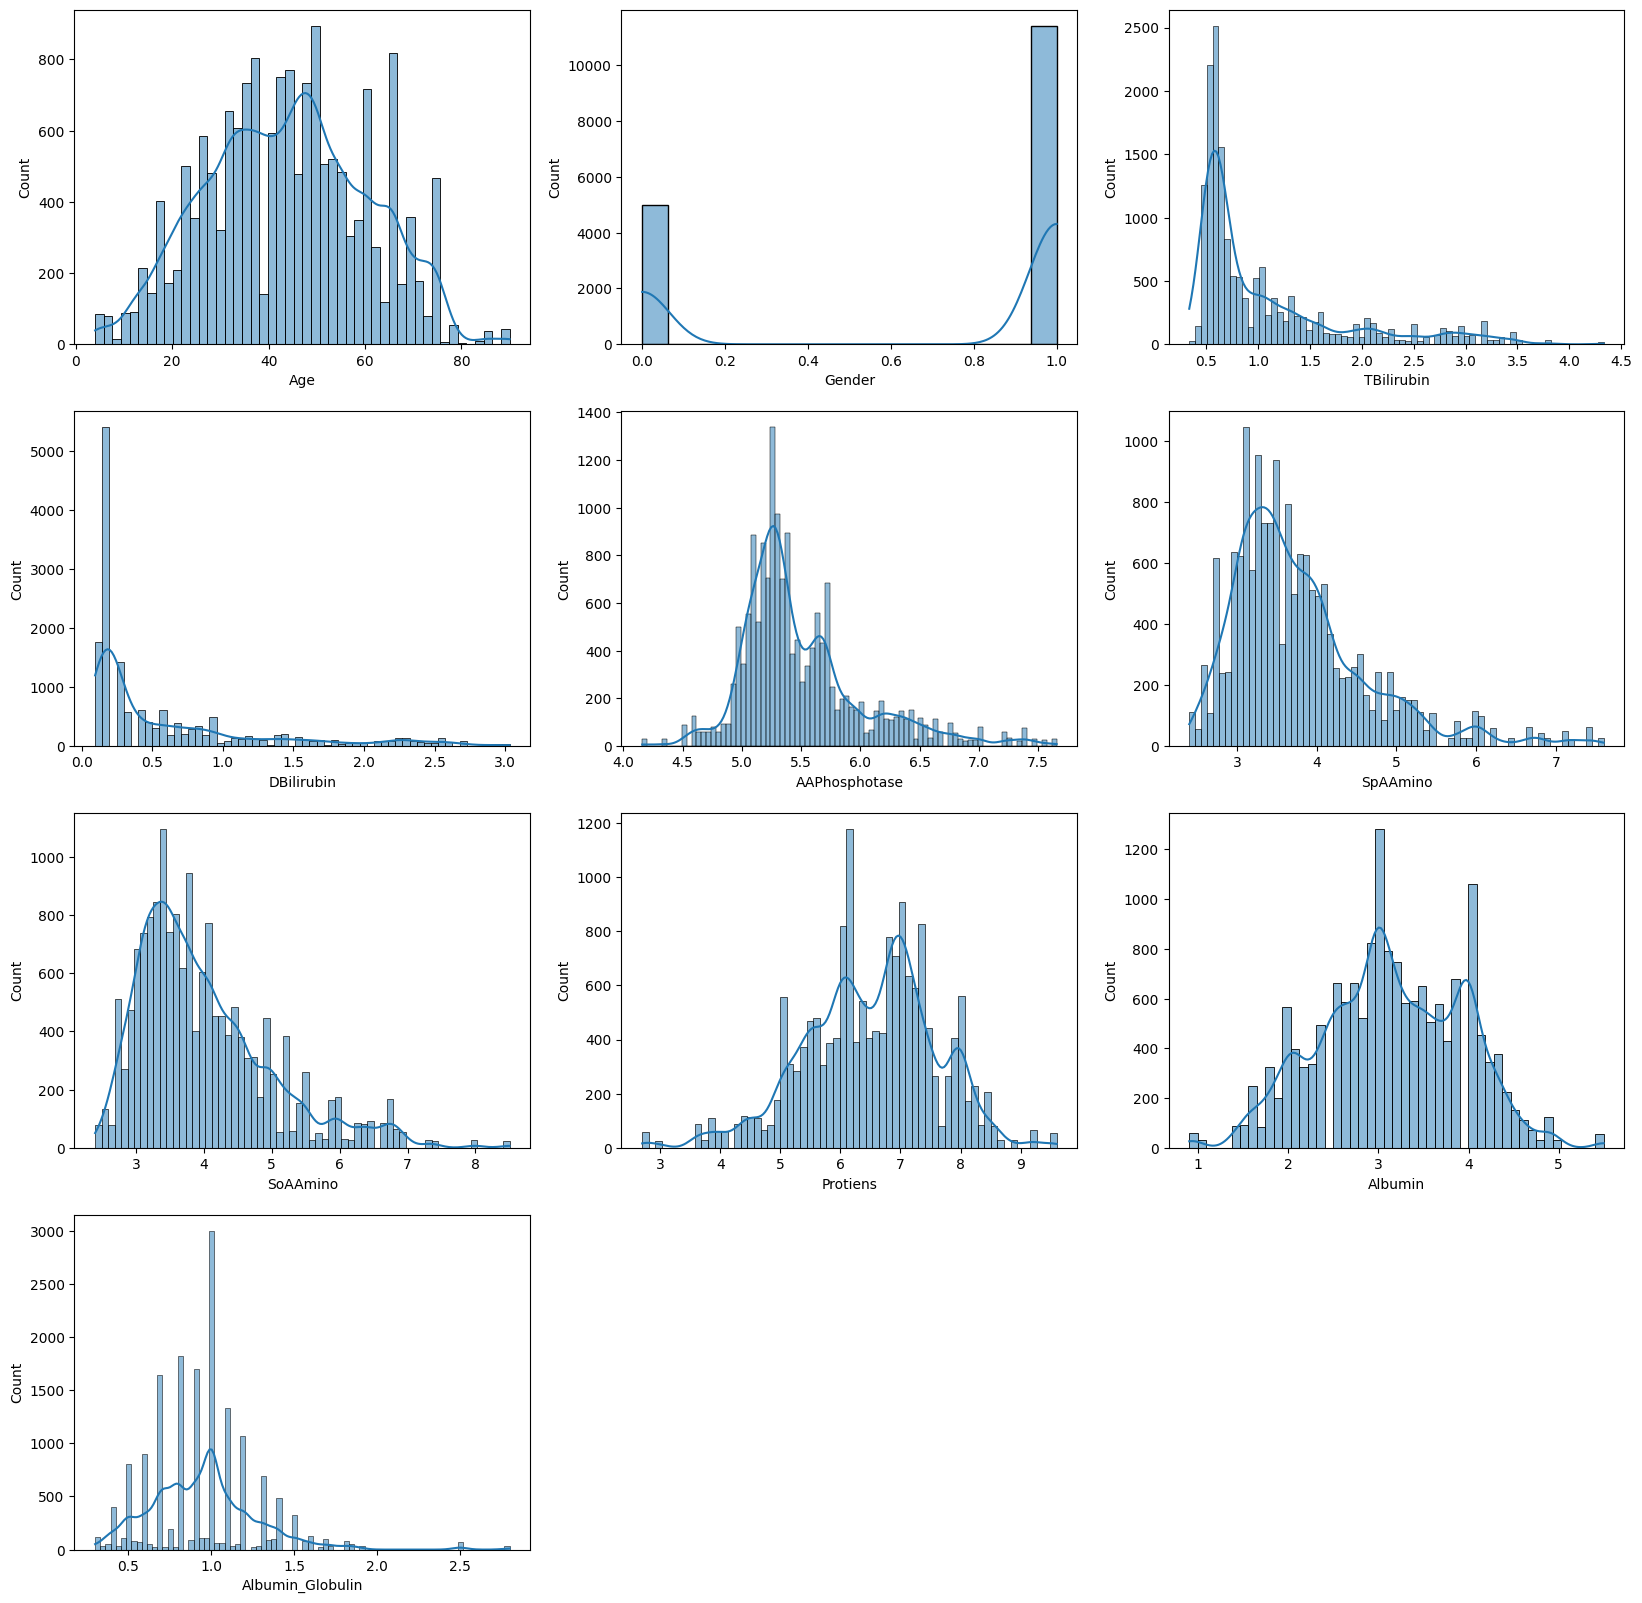

In [10]:
plt.figure(figsize=(20,20))
for i in range(len(df.columns)-1):
    plt.subplot(4,3,i+1)
    sns.histplot(df[df.columns[i]],kde=True)

plt.show()

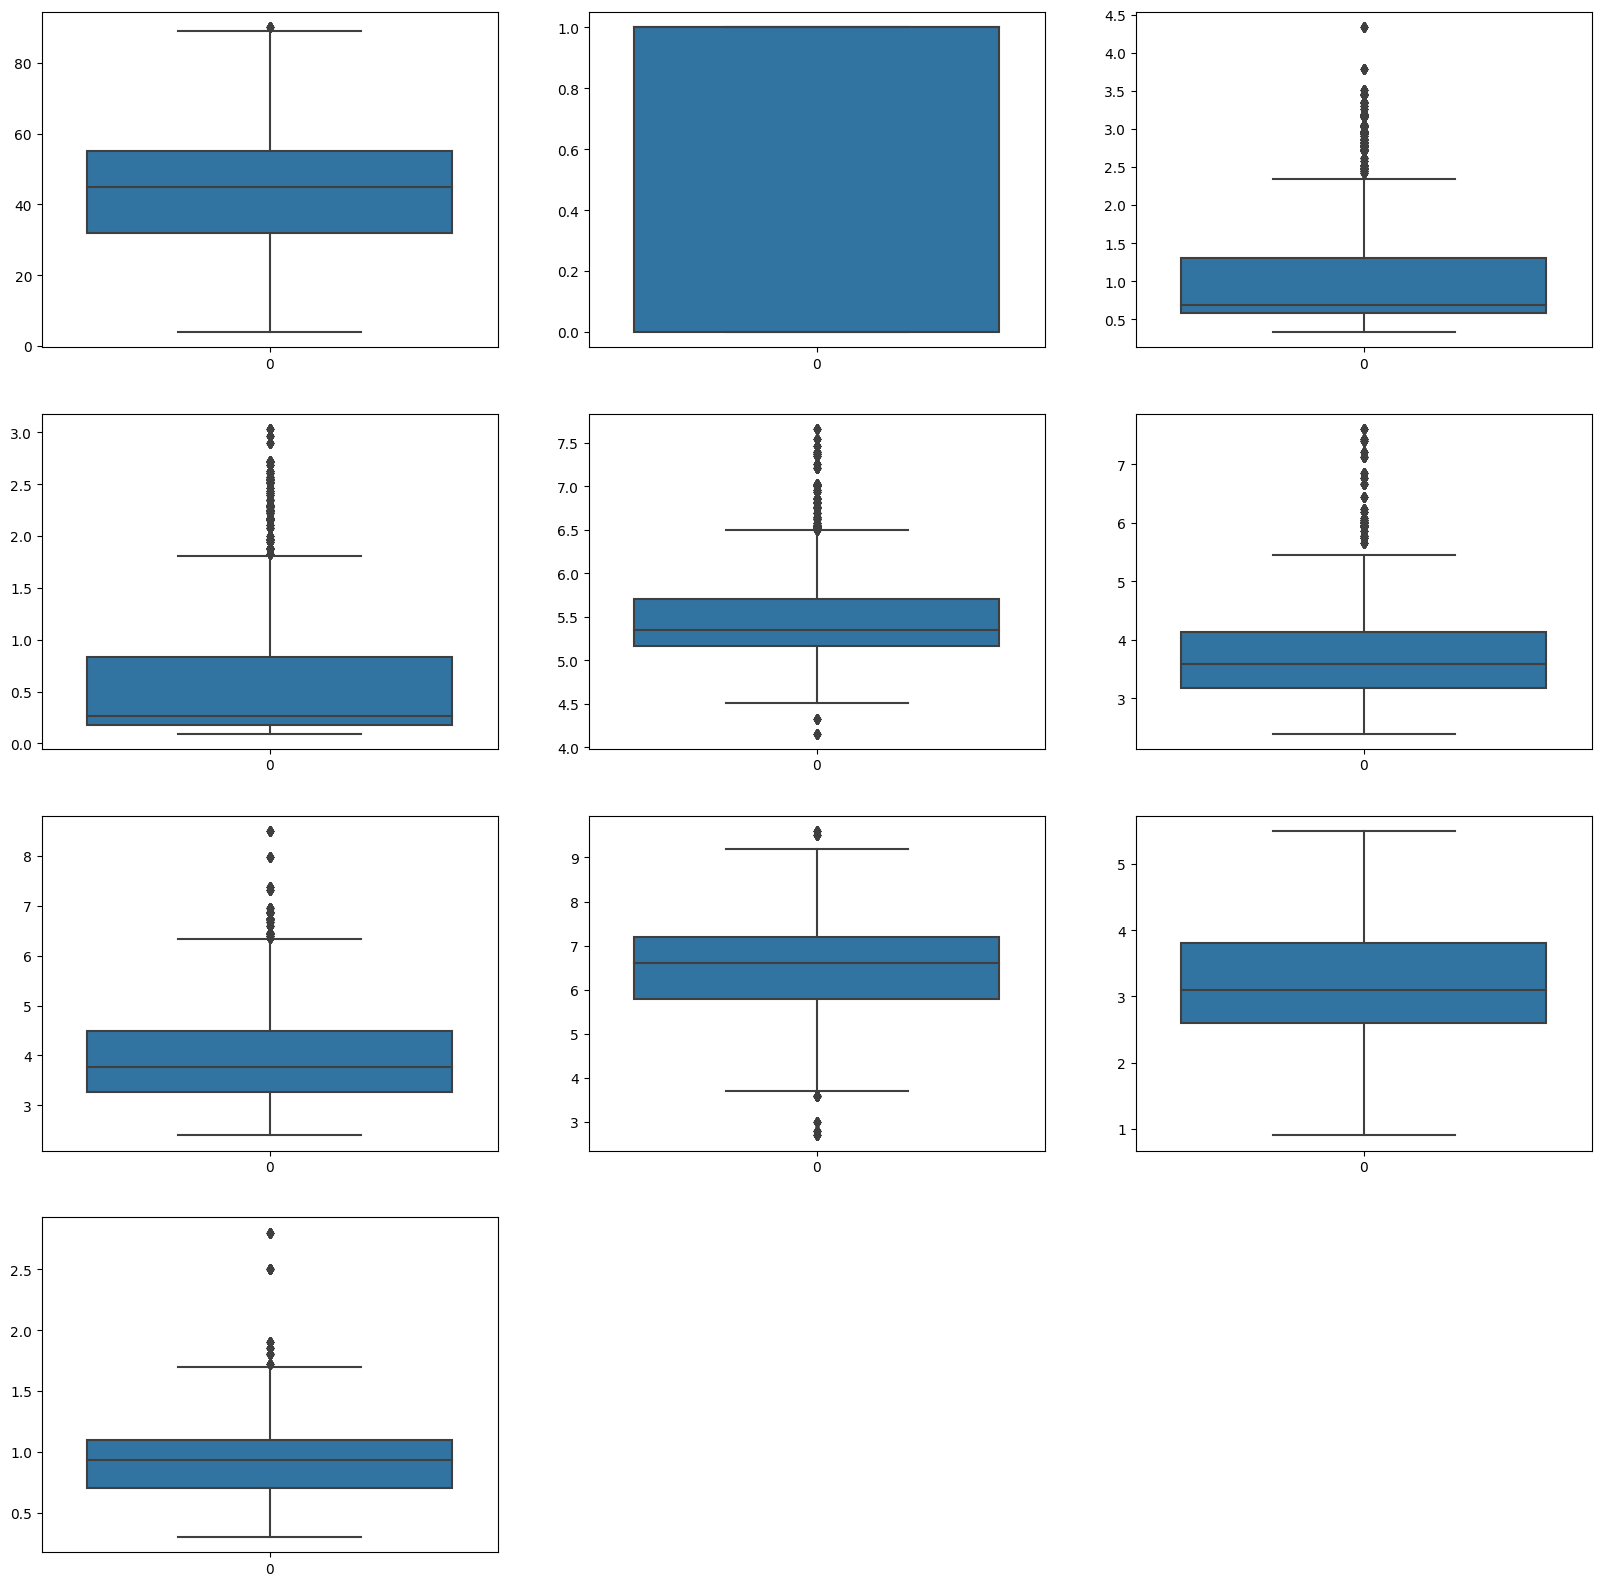

In [11]:
plt.figure(figsize=(20,20))
for i in range(len(df.columns)-1):
    plt.subplot(4,3,i+1)
    sns.boxplot(df[df.columns[i]])
plt.show()

In [12]:
def outliers_detections(col):
    q1=np.quantile(df[col],0.25)
    q3=np.quantile(df[col],0.75)
    IQR=q3-q1
    upper=q3+1.5*IQR
    lower=q1-1.5*IQR
    df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    

In [13]:
outliers_col=["TBilirubin",
    "DBilirubin",
    "AAPhosphotase",
    "SpAAmino",
    "SoAAmino"]

for val in outliers_col:
    outliers_detections(val)

In [14]:
df.head()

,Age,Gender,TBilirubin,DBilirubin,AAPhosphotase,SpAAmino,SoAAmino,Protiens,Albumin,Albumin_Globulin,Target
0,65.0,0,0.530628,0.095310,5.236442,2.833213,2.944439,6.8,3.3,0.90,1
1,62.0,1,2.389152,1.808790,6.495383,4.174387,4.615121,7.5,3.2,0.74,1
2,62.0,1,2.116256,1.629241,6.196444,4.110874,4.234107,7.0,3.3,0.89,1
3,58.0,1,0.693147,0.336472,5.209486,2.708050,3.044522,6.8,3.4,1.00,1
4,72.0,1,1.589235,1.098612,5.278115,3.332205,4.094345,7.3,2.4,0.40,1


In [15]:
df.to_csv("Liver_Preprocessed.csv")